In [1]:
#Import necessary packages
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import talib as tb
import numpy as np

In [2]:
#ScriptData Class to fetch and convert intraday data
class ScriptData:
    def fetch_intraday_data(self,script):
        ts = TimeSeries(key='WM2JDLF9NE04L6HG')
        data, meta_data = ts.get_intraday(script)
        return data
    def convert_intraday_data(self,d_data):
        df=pd.DataFrame.from_dict(d_data,orient="index")
        return df
    def getitem():
        pass
    def setitem():
        pass
    def contains():
        pass

In [3]:
#Indicator function to calcuate the moving average for the fetched data
def indicator1(dataFrame,timeperiod):
    indicator = tb.SMA(dataFrame['close'],timeperiod)
    i_data={'timestamp':dataFrame['timestamp'],'indicator': indicator}
    i_df=pd.DataFrame(i_data)
    return i_df

In [4]:
#Class Strategy to set BUY or SELL signals for the MA values
class Strategy:
    #Function to get converted intraday data
    def getData(self,script):
        ob = ScriptData()
        data=ob.fetch_intraday_data(script)
        df=ob.convert_intraday_data(data).reset_index()
        df.rename(columns = {'index':'timestamp','1. open':'open','2. high':'high','3. low':'low', '4. close':'close','5. volume':'volume'},inplace=True)
        return df
    #function to get indicators with Moving average values
    def getIndicatorData(self,df):
        mAvg_df=indicator1(df,5)
        return mAvg_df['indicator']
    #Function to get closing and indicator data
    def getScriptData(self,script):
        return self.getData(script)['close'],self.getIndicatorData(self.getData(script))
    #Function to set signals based on the indicator values
    def getSignals(self):
        flag=0
        operations=["SELL","BUY"]
        signal=[]
        close=[]
        for i in range(len(indicator_data)):
            if(indicator_data[i]=="NaN"):
                signal.append(0)
                close.append(0)
            elif indicator_data[i]<float(close_data[i]) and flag!=1:
                flag=1
                signal.append(operations[flag])
                close.append(indicator_data[i])
            elif indicator_data[i]>float(close_data[i]) and flag!=0:
                flag=0
                signal.append(operations[flag])
                close.append(indicator_data[i])
            else:
                signal.append(0)
                close.append(0)
        signals={"timestamp":df['timestamp'],"Signal":signal,"Close":close}
        signals=pd.DataFrame(signals)
        return signals

In [9]:
#Object of Strategy Class Created
st=Strategy()
df=st.getData("NVDA")
#Converting String Data to Float datatype
df['open']=df['open'].astype('float')
df['close']=df['close'].astype('float')
df['high']=df['high'].astype('float')
df['low']=df['low'].astype('float')
df['volume']=df['volume'].astype('float')
#Get closing data and indicator data
close_data,indicator_data=st.getScriptData("NVDA")
#Get the Signals dataframe with BUY or SELL signals
signals=st.getSignals()
signals

,timestamp,Signal,Close
0,2022-12-22 20:00:00,0,0.00000
1,2022-12-22 19:45:00,0,0.00000
2,2022-12-22 19:30:00,0,0.00000
3,2022-12-22 19:15:00,0,0.00000
4,2022-12-22 19:00:00,BUY,152.55600
...,...,...,...
95,2022-12-21 12:15:00,0,0.00000
96,2022-12-21 12:00:00,0,0.00000
97,2022-12-21 11:45:00,0,0.00000
98,2022-12-21 11:30:00,BUY,164.74858


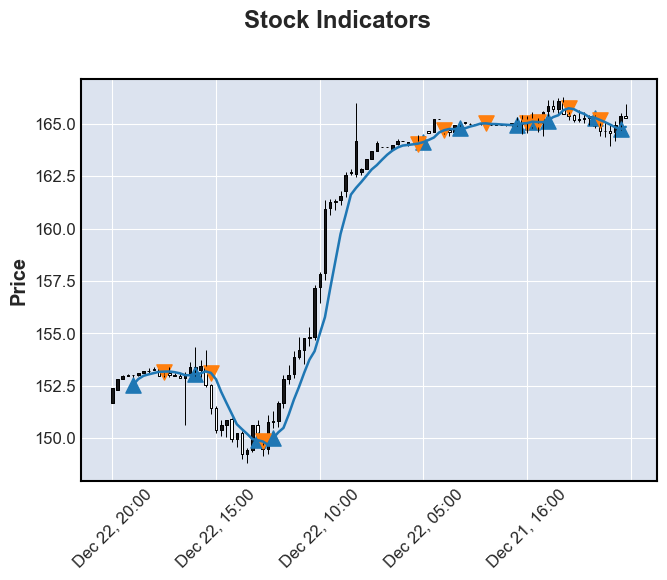

In [10]:
#Plotting of the CandleStick Chart using plotly
import plotly.graph_objects as go
import mplfinance as mpl
df.index = pd.DatetimeIndex(df['timestamp'])
buy=[]
sell=[]
#Fetching closing values for BUY and SELL Signals to plot Signal Indicators in the CandleStick Graph
for i in range(len(signals)):
    if signals.iloc[i]["Signal"]=="BUY":
        buy.append(signals.iloc[i]["Close"])
        sell.append(np.nan)
    elif signals.iloc[i]["Signal"]=="SELL":
        sell.append(signals.iloc[i]["Close"])
        buy.append(np.nan)
    else:
        buy.append(np.nan)
        sell.append(np.nan)
#Create Addplots to append to the Candlestick chart
sma = mpl.make_addplot(indicator_data)
buy_markers = mpl.make_addplot(buy, type='scatter', markersize=120, marker='^')
sell_markers = mpl.make_addplot(sell, type='scatter', markersize=120, marker='v')
adpts=[buy_markers,sell_markers, sma]
#Plot the Candlestick chart with SMA and Signals
mpl.plot(df,type='candle',
            addplot = adpts,
            title='Stock Indicators',
            ylabel='Price',  
            )